# Introduction
***

Mayflies, Junebugs, Fishfly, and Canadian Soldiers are just some of the nicknames for the small bugs *Hexagenia* that usually live about 1-3 days and spend most of their existence (about 2 years!) at the bottom of a riverbed. Like all species, they live to breed then die, the bare minimum required to make the species last yet another generation. However, the number of mayflies doesn't just increase year after year. Like other populations, one factor that causes the mayfly population to fluctuate is based on their environment. This important factor is how many mayflies a given area can actually support, a maximum mayfly population. 

<img src = "https://github.com/tstrade/mayflies-pic/blob/main/Mayfly-1.jpg?raw=true" width = "300" height = "300">

We want to explore a way to calculate and predict a population's growth just based on some intial data. Let's explore a simple example first, constant growth, and build to our goal, a realistic population model.

## Population Growth Model
***

Let $x_n$ represent the population in year $n$. We can define $x_n$ as being equal to $g(x_{n-1})$ *(the growth rate one year before year $n$)* times $x_{n-1}$ *(the population one year before year $n$)*. Or, more simply put: 
$$ x_n = g(x_{n-1}) \cdot x_{n-1} $$

For this example of a growth function, we can let our growth function $g$ be some constant, $a$. Now we have:
$$ x_n = a \cdot x_{n-1} $$

We can arrive at an explicit solution by the following steps:

$$ x_n = a \cdot x_{n-1}  \iff  x_{n-1} = a \cdot x_{n-2} \iff x_{n-2} = a \cdot x_{n-3} \iff \ ...$$ 

And therefore, by repeatedly plugging in these new definitions until we reach $x_0$ we get:

$$ x_n = a\cdot x_{n-1} = a \cdot (a \cdot x_{n-2}) = a \cdot (a \cdot (a \cdot x_{n-3})) = a \cdot a \cdot a ... \cdot x_0 $$

***

Then, our explicit solution is:

$$ x_n = a^n \cdot x_0 $$

Realistically, population growth does not tend towards positive or negative infinity like basic exponential functions do. Let's make $g(x)$ a decreasing function because as a population increases in an environment and resources become scarce, the growth rate of that population decreases. Similarly, as a population decreases and resources become more abundant, the growth rate of should increase.

We can denote the maximum population an environment can support as $M$, and use the difference between $M$ and the population $x$ we get:

$$ g(x_n) = a \cdot (M - x_n) $$

or as it will appear later:

$$ g(x_{n-1}) = a \cdot (M - x_{n-1}) $$

*These are the same growth rate equations, with the former representing the current year $n$ and the latter representing the year before year $n$, year $n-1$.*


Below we can graph this equation with some sliders to better visualize how the growth rate behaves. Let's start by importing the modules necessary and  then creating a graph.

<IPython.core.display.Javascript object>


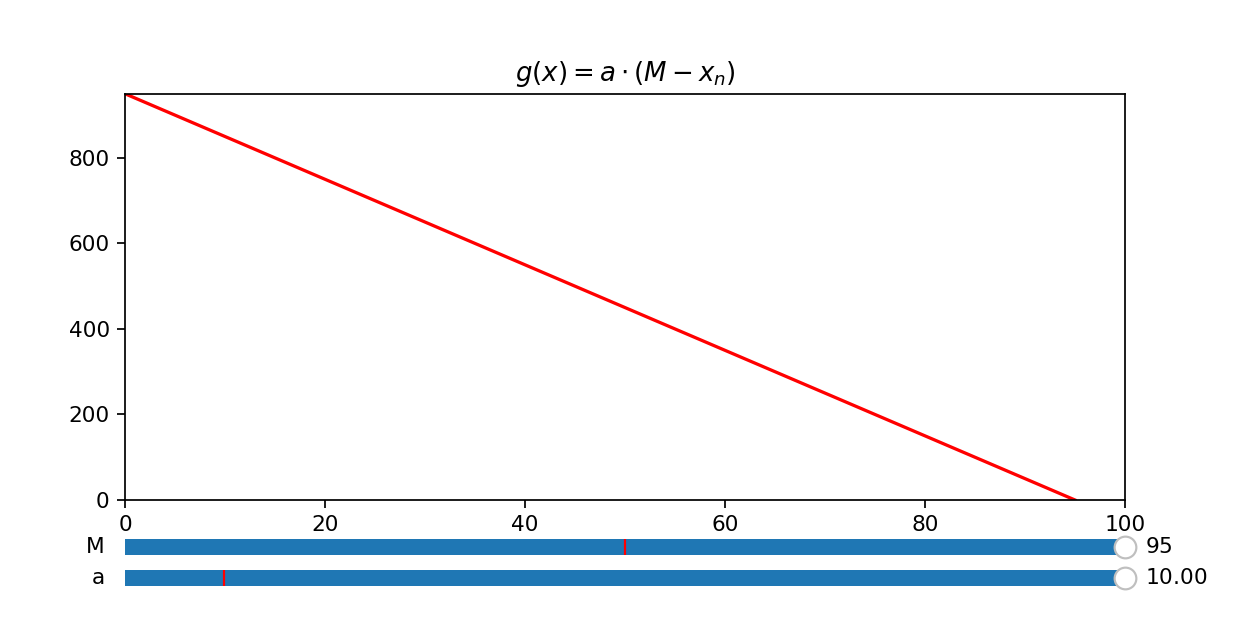

In [25]:
%matplotlib notebook
from matplotlib.widgets import Slider  # import the Slider widget
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def gofx(a, M, x):
    return a * (M - x)

a_min = .01         # Minimum value on slider for a
a_max = 10         # Maximum value on slider for a
a_0 = 1            # Initial value on slider for a, when the graph is created

M_min = 5
M_max = 95
M_0 = 50

x = np.linspace(0, 95, 10)
y = gofx(a_0, M_0, x)

fig = plt.figure(figsize = (8, 4))

lin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_a_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
slider_M_ax = plt.axes([0.1, 0.1, 0.8, 0.05])

# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(lin_ax) # select lin_ax
plt.title('$g(x) = a \cdot (M - x_n)$')
lin_plot, = plt.plot(x, y, 'r')
plt.xlim(0, 100)
plt.ylim(0, 950)

# here we create the slider
a_slider = Slider(slider_a_ax,      # the axes object containing the slider
                  'a',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_0  # initial value of the parameter
                 )


M_slider = Slider(slider_M_ax,      # the axes object containing the slider
                  'M',            # the name of the slider parameter
                  M_min,          # minimal value of the parameter
                  M_max,          # maximal value of the parameter
                  valinit=M_0,  # initial value of the parameter
                 )


# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(args):
    ylist = gofx(a_slider.val, M_slider.val, x)
    lin_plot.set_ydata(ylist)
    fig.canvas.draw_idle()                     # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)
M_slider.on_changed(update)

plt.show()

Our recursive equation describing a specific year's population now looks like:

$$ x_n = a \cdot (M - x_{n-1}) \cdot x_{n-1} $$

We can reduce terms by translating the equation into a description of the ratio of the population of year $n$ and the maximum population *(think of this as describing how full something is, with 0 being empty and 1 being full)*. We define $y_n = \frac{x_n}{M}$ so that we can derive $ x_n = y_n \cdot M $ to use for the substitution. Now, with some simplication necessary, our equation of interest is:

$$ y_n \cdot M = a \cdot (M - y_{n-1} \cdot M) \cdot y_{n-1} \cdot M \ \implies $$

$$ y_n = a \cdot (M - y_{n-1} \cdot M) \cdot y_{n-1} \ \implies $$

$$ y_n = aM \cdot (1 - y_{n-1}) \cdot y_{n-1} \ \implies $$

$$ y_n = aM \cdot (y_{n-1} - y_{n-1}^2) $$

And if we let $b = aM$, then:

$$ y_n = b \cdot (y_{n-1} - y_{n-1}^2) $$

## The Code 
***

Now that we've constructed our equation describing realistic population growth, let's define a function `mayfly_model` as taking three parameters:
1. `y0`: the initial population ratio
2. `b`: the growth constant
3. `n`: the number of years after the initial year

In [3]:
def mayfly_model(y0, b, n):
    y = [y0]                                # initializes a list of y data points starting with y0
    for i in range(n + 1):                  # Loops through integers up to and including n
        y.append(b * y[-1] - b * y[-1]**2)  # adds the results of the equation to the accumulator list
    return y

Let's go through the same process as when we constructed our graph for $g(x)$ to graph the behavior of $y_n$ and explore how populations like the mayfly population can change depending on various conditions. We will cap the silder for `b` at 5, but we will observe that the function actually breaks, or more accurately, the population collapses when `b` $> 4$. 

This is because the maximum value of the function is at $y = \frac{1}{2}$. Plugging this into our equation gives:

$$ b \cdot \frac{1}{2} - b \cdot (\frac{1}{2})^2 \ \implies \frac{b}{2} - \frac{b}{4} \ \implies \frac{b}{4} $$

Therefore, we will assume that $0 \leq b \leq 4 $

<IPython.core.display.Javascript object>


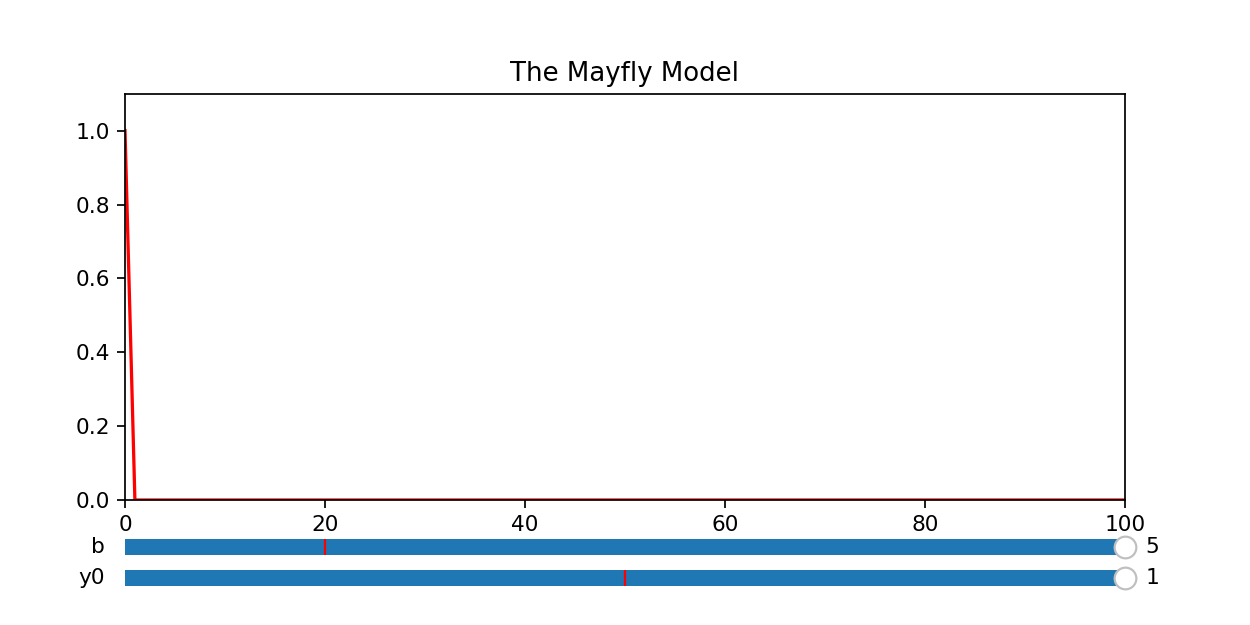

In [26]:
y0_min = 0
y0_max = 1
y0_init = .5

b_min = 0    
b_max = 5   
b_init = 1   

t = np.linspace(0, 100, 102)
y = mayfly_model(y0_init, b_init, 100)

fig = plt.figure(figsize=(8, 4))

liss_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_y0_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
slider_b_ax = plt.axes([0.1, 0.1, 0.8, 0.05])



# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(liss_ax) # select sin_ax
plt.title('The Mayfly Model')
liss_plot, = plt.plot(t, y, 'r')
plt.xlim(0, 100)
plt.ylim(0, 1.1)

# here we create the slider
y0_slider = Slider(slider_y0_ax,      # the axes object containing the slider
                  'y0',            # the name of the slider parameter
                  y0_min,          # minimal value of the parameter
                  y0_max,          # maximal value of the parameter
                  valinit=y0_init  # initial value of the parameter
                 )


b_slider = Slider(slider_b_ax,      # the axes object containing the slider
                  'b',            # the name of the slider parameter
                  b_min,          # minimal value of the parameter
                  b_max,          # maximal value of the parameter
                  valinit=b_init,  # initial value of the parameter
                 )


# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(args):
    ylist = mayfly_model(y0_slider.val, b_slider.val, 100)
    liss_plot.set_ydata(ylist)
    liss_plot.set_xdata(np.linspace(0, 100, 102))
    fig.canvas.draw_idle()                     # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
y0_slider.on_changed(update)
b_slider.on_changed(update)

plt.show()

Let's first let `y0 = 0.5`, which is our initial condition on the slider. We can then examine the effect of changing `b`.

*Remember: $y_n$ is a ratio of the population to the max, the same as calculating a grade out of 100*
***
|Growth Rate|Result|
|:---------:|:----:|
|$b = 0$| The population collapses to 0 |
|$b < 1$| The population decays to 0|
|$1 \leq b < 2$| The population experiences a small decay then stabilizes|
|$b = 2$| The population is completely stable at 0.5|
|$2 < b \lessapprox 3$| The population experiences small spike then stabilizes at $\approx 0.64$|
|$3 \leq b < 4$| The population bounces between values, almost partially stable in a cyclically pattern of ups and downs|
|$b = 4$| The population bounces between extremes, never growing large enough to collapse but instead just cyclically nears extinction|
|$b > 4$| The population initially grows too fast and then collapses, perhaps killing itself off or destroying the environment|

Now that we have established some base behavior for $y$ and varius growth rate's `b` when `y0 = 0`. We can test `b` at other values for `y0`, like .25 and .75. Use the slider to examine `b` values effect on $y$. 

When `y0 = .25`,
- $y$ stabilizes at 0.5 when `b = 2`
- $y$ stabilizes at $\approx$ 0.64 when `2 < b <= 3`
- $y$ enters a cyclic pattern of ups and downs of approximately the same size as when `y0 = 0.5`
- $y$ bounces between extremes when `b = 4`
- $y$ explodes too fast and drops to 0 when `b > 4`

And when `y0 = .75`, the same results are achieved. In fact, for any value of `y0`, the function

$$ y_n = b \cdot (y_{n-1} - y_{n-1}^2) $$

will have the same long term behavior. This means that the population is dependent soley on `b` in the long term. Recall that when we crafted $y_n$ earlier, one simplification that was made was the substitution $b = aM$. And what were each of these terms? In Figure 1, we built a graph of the function $g(x) = a \cdot (M - x_n)$, where $a$ was just some growth constant and $M$ was the population cap, some maximum amount capable of being supported by the environment.

# Conclusion
***

In conclusion, understanding population growth is important for many fields of study, including ecology, economics, and public health. In this project, we explored a simple example of a constant growth model, and built up to a more realistic population model that takes into account a maximum population an environment can support. We used a decreasing growth rate function to simulate the effects of scarce resources on population growth, and created a graph to visualize the behavior of the growth rate as a function of population size. We learned that the initial population plays little role in the long term, where the growth rate is the main controlling factor for population behavior. Overall, by studying population growth models, we can better understand the dynamics of species in their environment and make more informed decisions about how to manage and protect them.